# 3.1 : Classification using Linear SVC

First, we import necessary libraries for performing machine learning.

In [11]:
# Import needed parts of sklearn functionality.
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix,classification_report, precision_recall_curve
from sklearn.svm import SVC
from sklearn.exceptions import ConvergenceWarning

# Import other needed libraries.
import matplotlib.pyplot as plt
import pandas as panda
import numpy as np
import warnings

Then, we read the data to perform the necessary 3.1 parameter tests for our chosen classifier. (In this case cleaned up data is used.)

In [2]:
cuisineData = panda.read_csv('cleaned_cuisines.csv')

In [3]:
cuisineData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3995 entries, 0 to 3994
Columns: 382 entries, Unnamed: 0 to zucchini
dtypes: int64(381), object(1)
memory usage: 11.6+ MB


<Axes: ylabel='cuisine'>

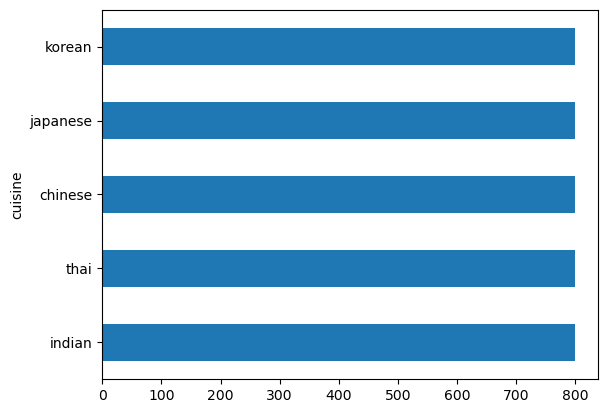

In [4]:
cuisineData.cuisine.value_counts().plot.barh()

Then we split the data into training and testing sets.

In [5]:
cuisines_label_cD = cuisineData['cuisine']
cuisines_feature_cD = cuisineData.drop(['Unnamed: 0', 'cuisine'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(cuisines_feature_cD, cuisines_label_cD, test_size=0.3, random_state=0)

Then we define the ranges for our C parameter, and create a space to store our results.

In [6]:
c_values = [0.1, 0.5, 1, 10, 100]
results = {}

Now, we want to loop through our different C parameter values to train our model. We can do this by looping through each C value.

In [7]:
for C in c_values:
    classifier = SVC(kernel='linear', C=C, probability=True, random_state=0)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[C] = accuracy

Then, to showcase our training results, we print a statement for each parameter value.

In [8]:
for C, accuracy in results.items():
    print("Accuracy for C=%s: %0.1f%%" % (C, accuracy * 100))

Accuracy for C=0.1: 79.5%
Accuracy for C=0.5: 80.5%
Accuracy for C=1: 80.7%
Accuracy for C=10: 80.9%
Accuracy for C=100: 79.6%


## Max Iterations Parameter Tweak

In a desire to do the same as before, we now create a range for the amount of max iterations we wish to tweak.

In [9]:
max_iter_values = [300, 400, 500, 600, 700]
results = {}

Then, by looping through the max iteration ranges, we print the tweaked results.

In [14]:
for max_iter in max_iter_values:
    classifier = SVC(kernel='linear', max_iter=max_iter, probability=True, random_state=0)
    
    # Use a context manager to temporarily suppress convergence warnings
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", category=ConvergenceWarning)
        classifier.fit(X_train, y_train)
    
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[max_iter] = accuracy

for max_iter, accuracy in results.items():
    print("Accuracy for max iterartions at %s: %0.1f%%" % (max_iter, accuracy * 100))

Accuracy for max iterartions at 300: 79.4%
Accuracy for max iterartions at 400: 80.0%
Accuracy for max iterartions at 500: 80.8%
Accuracy for max iterartions at 600: 80.7%
Accuracy for max iterartions at 700: 80.7%


## Tolerance Parameter Tweak

As with the two previous parameters, we create a range of values for the tolerance.

In [15]:
tolerances = [1e-1, 1e-2, 1e-3, 1e-4, 1e-10]
results = {}

Then, as with the previous tweaks, we loop through it and print the results.

In [16]:
for tol in tolerances:
    classifier = SVC(kernel='linear', tol=tol, probability=True, random_state=0)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[tol] = accuracy

# Print the results
for tol, accuracy in results.items():
    print("Accuracy for tol=%s: %0.1f%%" % (tol, accuracy * 100))

Accuracy for tol=0.1: 80.2%
Accuracy for tol=0.01: 80.7%
Accuracy for tol=0.001: 80.7%
Accuracy for tol=0.0001: 80.7%
Accuracy for tol=1e-10: 80.7%
